In [54]:
import pandas as pd
import requests
from PIL import Image
from io import BytesIO
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from helper import showimg
%matplotlib inline
# case_plane 平面图
# case_art 效果图
# case_struct 结构图

In [2]:
# names1 = ['uid', 'cid', 'cname', 'artnums', 'direction', 'puttime', 'plid', 'filename']
# names2 = ['uid', 'cid', 'cname', 'artnums', 'direction', 'puttime', 'aid', 'filename']
# names3 = ['uid', 'cid', 'cname', 'artnums', 'direction', 'puttime', 'tid', 'filename']

# dataset1 = pd.read_csv('data/ods_data/mata2019050901_bak.csv', encoding='utf-8', header=None, names=names1)
# dataset2 = pd.read_csv('data/ods_data/mata2019050902_bak.csv', encoding='utf-8', header=None, names=names2)
# dataset3 = pd.read_csv('data/ods_data/mata2019050903_bak.csv', encoding='utf-8', header=None, names=names3)

# dataset2 = dataset2.drop(['cname', 'direction', 'artnums'], axis=1)

# dataset1.to_csv('data/deploy/case_plane.csv', index=False)
# dataset2.to_csv('data/deploy/case_art.csv', index=False)
# dataset3.to_csv('data/deploy/case_struct.csv', index=False)

pd.set_option('display.max_colwidth',120)

In [3]:
case_struct = pd.read_csv('data/deploy/case_struct.csv')

In [4]:
case_struct_valid = case_struct[case_struct.filename != '\\N'].sort_values(by=['cid', 'puttime'])

In [5]:
case_struct_valid.shape[0] / case_struct.shape[0]

0.9956817639684972

In [6]:
'pic.to8to.com/case/{}'.format(case_struct_valid.loc[252678, 'filename'])

'pic.to8to.com/case/1411/22/20141122_07a83b1e7296394094151h4fdctfahhb.jpg'

In [57]:
case_struct_valid.head()

,uid,cid,cname,artnums,direction,puttime,tid,filename
252678,70858,24596,碧桂园,3,NaN,1264934010,13447,1411/22/20141122_07a83b1e7296394094151h4fdctfahhb.jpg
510669,70858,24757,万科金域蓝湾160,5,这是一套现代中式的方案，现代感较强。,1265182506,13451,1411/22/20141122_fc8e0c62732d3e646eb4nvusq97xtean.jpg
252679,90267,28648,恒大翰城,18,这是一套105平米的美式家装案例，整体简约大气，成熟稳重，家具选择上，比较偏向于传统美式，造型优美，色调朴实沉稳，大量木质材料的运用， 自然又清新。,1269757112,381698,1807/16/20180716_b5ab6731a376de68dde4mg2dwch5p7tv.jpeg
0,90267,29223,简雅*北欧,32,NaN,1270026936,331574,1807/03/20180703_5920d859625da947c1e7cje7w2g277c4.gif
252680,90267,29752,原木北欧,18,新古典主义的设计风格其实就是经过改良的古典主义风格。一方面保留了材质、色彩的大致风格，仍然可以很强烈地感受传统的历史痕迹与浑厚的文化底蕴，同时又摒弃了过于复杂的肌理和装饰，简化了线条。新古典主义的灯具则将古典的繁复雕饰经过简化，并与...,1270278125,331533,1807/03/20180703_1a40443c49860272c968e8f7dg8gpz4g.jpg


In [45]:
def download_img_by_filename(filename, timeout=3, bgr=False, proc_func=None):
    img_url = 'https://pic.to8to.com/case/{}'.format(filename)
    try:
        res = requests.get(img_url, timeout=timeout)
    except:
        return None
    img_ndarray = np.asarray(Image.open(BytesIO(res.content)))
    if bgr:
        img_ndarray = img_ndarray[:, :, [2, 1, 0]]
    if proc_func is not None:
        img_ndarray = proc_func(img_ndarray)
    return img_ndarray

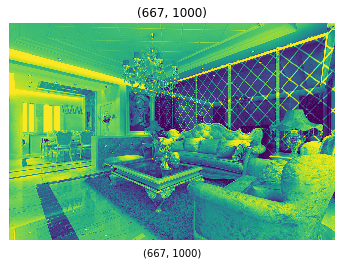

In [55]:
filename = case_struct_valid.loc[252678, 'filename']

img_data = download_img_by_filename(filename,
                                    timeout=1,
                                    bgr=True,
                                    proc_func=lambda x: cv.cvtColor(x, cv.COLOR_BGR2GRAY))

showimg(img_data)

In [25]:
gray= cv.cvtColor(x, cv.COLOR_BGR2GRAY)

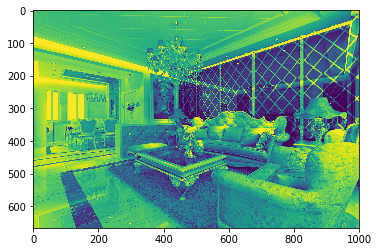

In [27]:
plt.imshow(gray)

In [64]:
list(case_struct_valid.index)

[252678,
 510669,
 252679,
 0,
 252680,
 252681,
 510670,
 1,
 2,
 764508,
 252682,
 764509,
 764510,
 3,
 510671,
 252683,
 510672,
 510673,
 510674,
 764511,
 4,
 252684,
 252685,
 510675,
 764512,
 5,
 764513,
 6,
 510676,
 7,
 252686,
 510677,
 510678,
 510679,
 510680,
 510681,
 510682,
 510683,
 510684,
 252687,
 510685,
 252688,
 8,
 252689,
 252690,
 510686,
 764514,
 9,
 510687,
 510688,
 10,
 764515,
 764516,
 510689,
 252691,
 252692,
 510690,
 510691,
 252693,
 764517,
 11,
 12,
 252694,
 13,
 14,
 15,
 16,
 510692,
 510693,
 17,
 510694,
 18,
 764518,
 19,
 510695,
 20,
 510696,
 21,
 510697,
 510698,
 510699,
 510700,
 510701,
 764519,
 510702,
 22,
 23,
 24,
 25,
 26,
 510703,
 764520,
 764521,
 252695,
 252696,
 27,
 510704,
 252697,
 252698,
 510705,
 764522,
 510706,
 28,
 252699,
 252700,
 252701,
 252702,
 29,
 252703,
 30,
 510707,
 252704,
 764523,
 252705,
 510708,
 31,
 32,
 33,
 34,
 764524,
 764525,
 764526,
 764527,
 35,
 36,
 37,
 252706,
 510709,
 764528,
 

In [66]:
a = np.array([[[1,3], [1,2]]])

In [69]:
from helper import saveJson, loadJson

In [71]:
index_img_data = loadJson('data/index_img_data.json')

In [81]:
len(index_img_data[1][3][1])

3200